In [150]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

data = pd.read_csv('titanic_data.csv')


In [151]:
data.Age = data.Age.fillna(data.Age.mean())
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


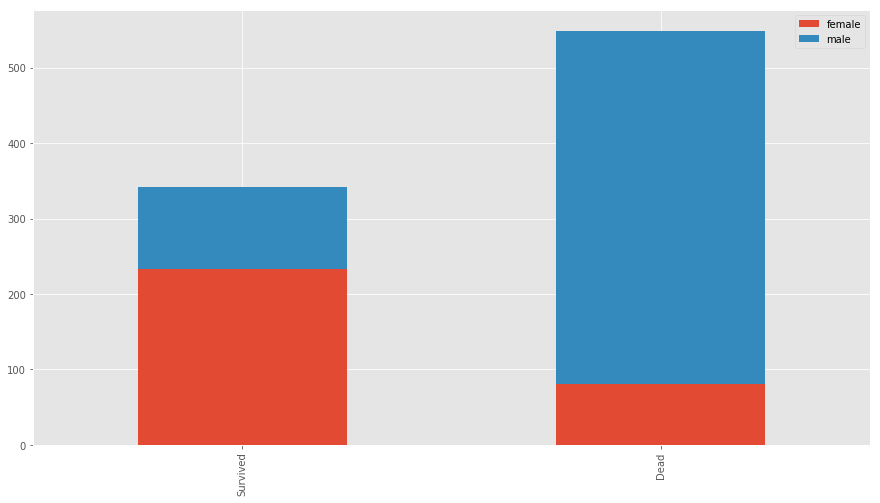

In [152]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
comb = pd.DataFrame([survived_sex,dead_sex])
comb.index = ['Survived','Dead']
comb.plot(kind = 'bar',stacked = True,figsize = (15,8))

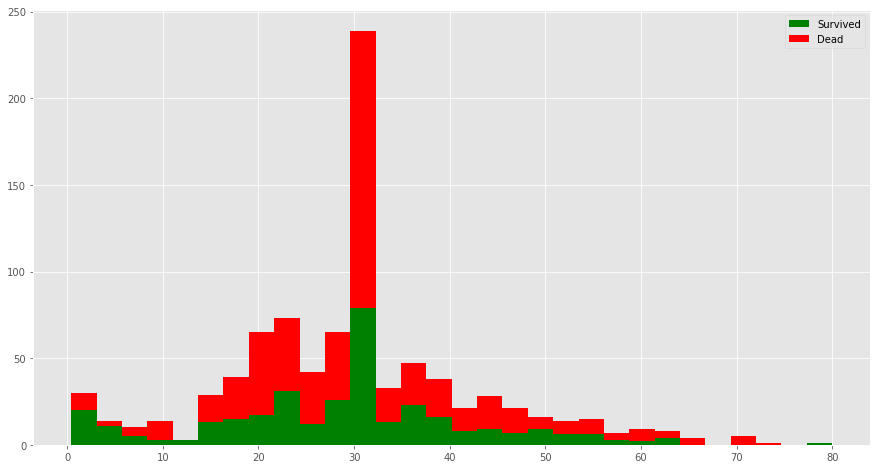

In [153]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.legend()

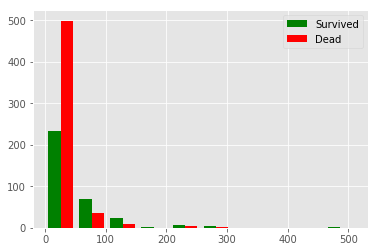

In [154]:
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],bins = 10,color = ['g','r'],
        label = ['Survived','Dead'])
plt.legend()

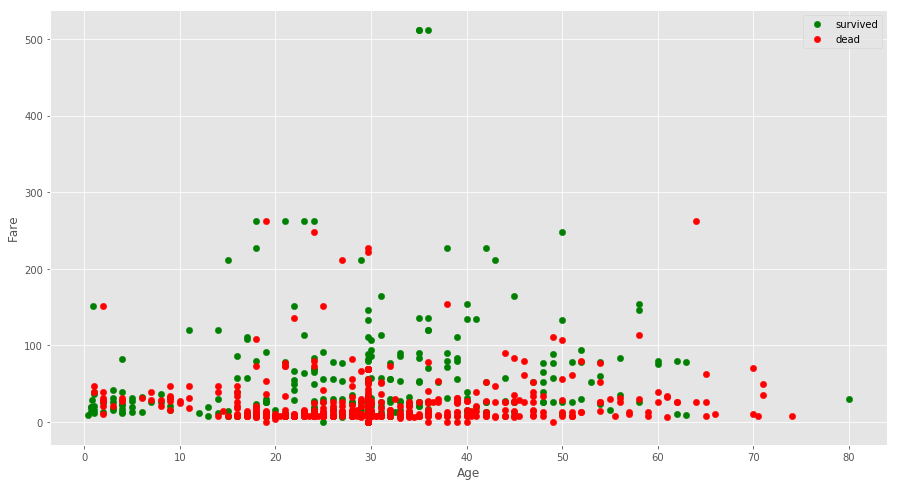

In [155]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived'] == 1]['Age'],data[data['Survived']==1]['Fare'],color = 'g',s = 40)
ax.scatter(data[data['Survived'] == 0]['Age'],data[data['Survived']==0]['Fare'],color = 'r',s = 40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'))

S    644
C    168
Q     77
Name: Embarked, dtype: int64


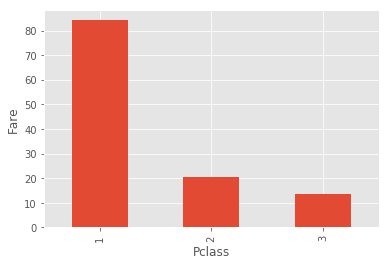

In [156]:
ax = plt.subplot()
ax.set_ylabel('Fare')
(data.groupby('Pclass').mean()['Fare']).plot(kind = 'bar',ax = ax)
print(data['Embarked'].value_counts())

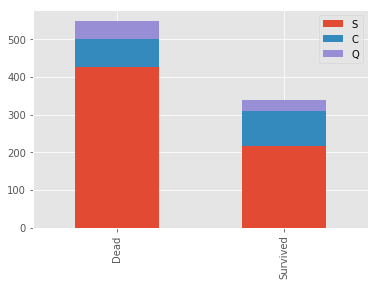

In [157]:
emb_died = data[data['Survived']==0]['Embarked'].value_counts()
emb_survived = data[data['Survived']==1]['Embarked'].value_counts()
comb = pd.DataFrame([emb_died,emb_survived])
comb.index = ['Dead','Survived']
comb.plot(kind = 'bar',stacked = True)

In [158]:
#Feature Engineering
df_train = pd.read_csv('titanic_data.csv')
df_test = pd.read_csv('test.csv')
targets = df_train.Survived
df_train.drop('Survived',axis = 1,inplace = True)
combined = df_train.append(df_test)

combined.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
combined['Title'] = combined.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
combined.Title.value_counts()

Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
combined.Title = combined.Title.map(Title_Dictionary)
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [160]:
gt_train = combined.head(891).drop(['PassengerId','SibSp','Parch'],axis = 1).groupby(
    ['Sex','Pclass','Title']).median()
gt_test = combined.iloc[891:].drop(['PassengerId','SibSp','Parch'],axis = 1).groupby(
    ['Sex','Pclass','Title']).median()

In [161]:
gt_train

Age       Fare
Sex    Pclass Title                   
female 1      Miss     30.0   88.25000
              Mrs      40.0   79.20000
              Officer  49.0   25.92920
              Royalty  40.5   63.05000
       2      Miss     24.0   13.00000
              Mrs      31.5   26.00000
       3      Miss     18.0    8.75625
              Mrs      31.0   15.97500
male   1      Master    4.0  120.00000
              Mr       40.0   42.40000
              Officer  51.0   35.50000
              Royalty  40.0   27.72080
       2      Master    1.0   26.00000
              Mr       31.0   13.00000
              Officer  46.5   13.00000
       3      Master    4.0   28.51250
              Mr       26.0    7.89580

In [162]:
gt_test

Age       Fare
Sex    Pclass Title                   
female 1      Miss     32.0  158.20835
              Mrs      48.0   63.35830
              Royalty  39.0  108.90000
       2      Miss     19.5   24.50000
              Mrs      29.0   26.00000
       3      Miss     22.0    7.87920
              Mrs      28.0   14.28125
male   1      Master    9.5  198.43750
              Mr       42.0   50.24790
              Officer  53.0   81.85830
       2      Master    5.0   27.75000
              Mr       28.0   13.00000
              Officer  35.5   19.50000
       3      Master    7.0   15.24580
              Mr       25.0    7.85420

In [163]:
def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, gt_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, gt_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)

combined['Fare'] = combined['Fare'].fillna(combined.Fare.mean())

#Replace by mean for resulting Age nulls---effectively giving 3 outliers 
#but it should be negligible compared to 1309 values
combined['Age'] = combined['Age'].fillna(combined.Fare.mean())
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,30.567136,0.498854,0.385027,33.295479
std,378.020061,0.837836,12.955684,1.041658,0.865560,51.738879
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [164]:
combined['Embarked'] = combined['Embarked'].fillna('S')
combined['FamilySize'] = combined['SibSp'] + combined['Parch']
combined = combined.drop(['PassengerId','Name','SibSp','Parch'],axis = 1)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass        1309 non-null int64
Sex           1309 non-null object
Age           1309 non-null float64
Ticket        1309 non-null object
Fare          1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Title         1309 non-null object
FamilySize    1309 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 102.3+ KB


In [165]:
combined.Cabin.fillna('U',inplace = True)
combined['Cabin'] = combined['Cabin'].map(lambda s:s[0])

In [166]:
combined['Sex'] = combined['Sex'].map({'male':0,'female':1})


In [167]:
combined['Ticket'] = combined.Ticket.apply(lambda t:t[0] if not t[0].isdigit() else 'X')

In [168]:
# introducing other features based on the family size
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

combined

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,0,22.000000,A,7.2500,U,S,Mr,1,1,0,0
1,1,1,38.000000,P,71.2833,C,C,Mrs,1,1,0,0
2,3,1,26.000000,S,7.9250,U,S,Miss,0,0,0,0
3,1,1,35.000000,X,53.1000,C,S,Mrs,1,1,0,0
4,3,0,35.000000,X,8.0500,U,S,Mr,0,0,0,0
5,3,0,33.295479,X,8.4583,U,Q,Mr,0,0,0,0
6,1,0,54.000000,X,51.8625,E,S,Mr,0,0,0,0
7,3,0,2.000000,X,21.0750,U,S,Master,4,0,1,0
8,3,1,27.000000,X,11.1333,U,S,Mrs,2,0,1,0
9,2,1,14.000000,X,30.0708,U,C,Mrs,1,1,0,0


In [169]:
#Encode all variables
pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
combined = pd.concat([combined,pclass_dummies],axis=1)
combined.drop('Pclass',axis=1,inplace=True)

#Encode all variables
s_dummies = pd.get_dummies(combined['Sex'], prefix="Sex")
combined = pd.concat([combined,s_dummies],axis=1)
combined.drop('Sex',axis=1,inplace=True)

#Encode all variables
t_dummies = pd.get_dummies(combined['Ticket'], prefix="Ticket")
combined = pd.concat([combined,t_dummies],axis=1)
combined.drop('Ticket',axis=1,inplace=True)


#Encode all variables
e_dummies = pd.get_dummies(combined['Embarked'], prefix="Embarked")
combined = pd.concat([combined,e_dummies],axis=1)
combined.drop('Embarked',axis=1,inplace=True)




In [170]:
combined

,Age,Fare,Cabin,Title,FamilySize,Singleton,SmallFamily,LargeFamily,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_X,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,U,Mr,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,C,Mrs,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,26.000000,7.9250,U,Miss,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,35.000000,53.1000,C,Mrs,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,35.000000,8.0500,U,Mr,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
5,33.295479,8.4583,U,Mr,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
6,54.000000,51.8625,E,Mr,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
7,2.000000,21.0750,U,Master,4,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
8,27.000000,11.1333,U,Mrs,2,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
9,14.000000,30.0708,U,Mrs,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [171]:
#Encode all variables
c_dummies = pd.get_dummies(combined['Cabin'], prefix="Cabin")
combined = pd.concat([combined,c_dummies],axis=1)
combined.drop('Cabin',axis=1,inplace=True)

#Encode all variables
t_dummies = pd.get_dummies(combined['Title'], prefix="Title")
combined = pd.concat([combined,t_dummies],axis=1)
combined.drop('Title',axis=1,inplace=True)


In [172]:
combined

,Age,Fare,FamilySize,Singleton,SmallFamily,LargeFamily,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_X,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.000000,7.2500,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,38.000000,71.2833,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,26.000000,7.9250,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,35.000000,53.1000,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,35.000000,8.0500,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,33.295479,8.4583,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,54.000000,51.8625,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,2.000000,21.0750,4,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8,27.000000,11.1333,2,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,14.000000,30.0708,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


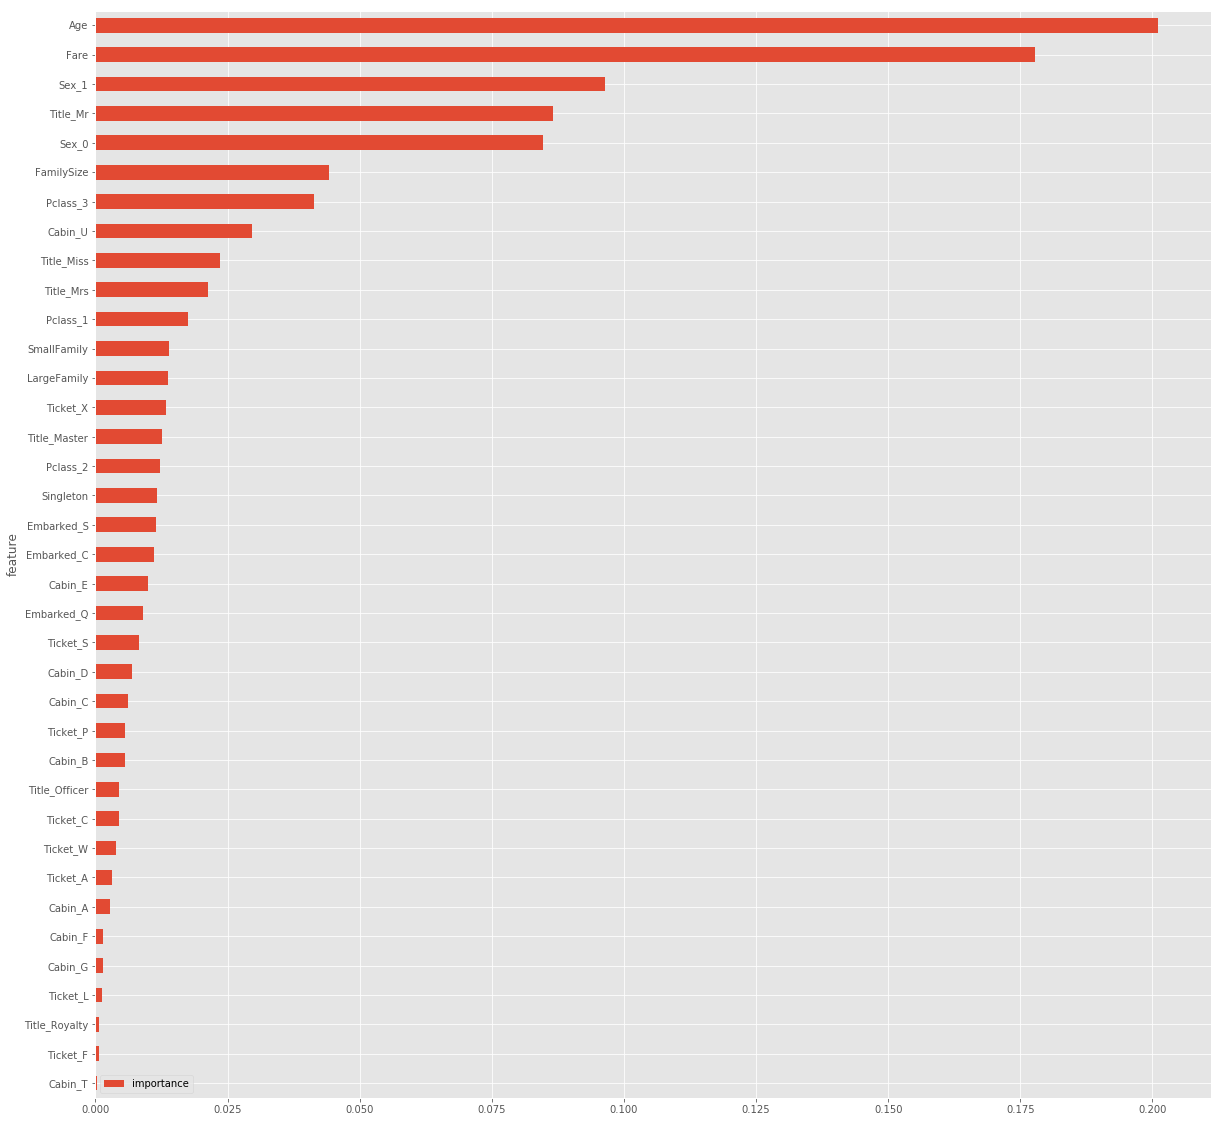

In [173]:
#Feature Importance

from sklearn.feature_selection import SelectFromModel
train = combined.head(891)
target = data.Survived
test = combined.iloc[891:]

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,max_features = 'sqrt')
clf = clf.fit(train,targets)
clf.feature_importances_



features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)



features.plot(kind='barh', figsize=(20, 20))



In [174]:
#Select Features from above
model = SelectFromModel(clf,prefit=True)
train_reduced = model.transform(train)
test_reduced = model.transform(test)

In [175]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cv = StratifiedKFold(targets,n_folds = 5)

gscv = GridSearchCV(forest,
                    scoring='accuracy',
                    param_grid=parameter_grid,
                    cv=cv)

gscv.fit(train, targets)
model = gscv
parameters = gscv.best_params_

clf = RandomForestClassifier(**parameters)

clf = clf.fit(train,targets)
out = clf.predict(test)

sub = pd.DataFrame()
data = pd.read_csv('test.csv')
sub['PassengerId'] = data['PassengerId']
sub['Survived'] = out

sub.to_csv('submissions.csv',sep = '\t',encoding = 'utf-8',index = False)

np.mean(cross_val_score(clf,train,targets,cv=5,scoring='accuracy'))

0.8316911525586862